# Sales Prediction 

# Import libraries

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score

# Import the dataset

In [81]:
sales_data = pd.read_csv('advertising.csv')

# Exploration of data

In [82]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [83]:
sales_data.shape

(200, 4)

In [84]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [85]:
sales_data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [86]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Scatter plot

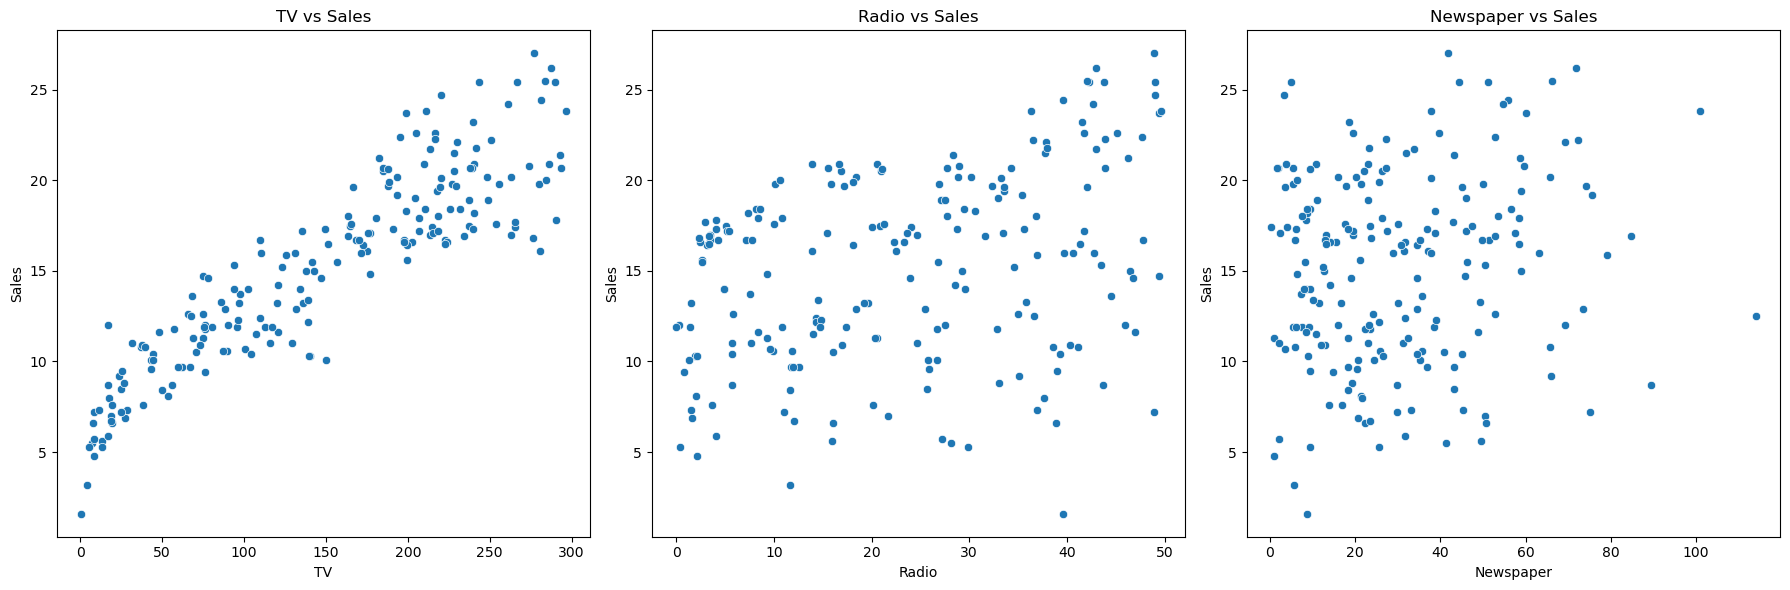

In [87]:
fig , axes = plt.subplots(nrows = 1 , ncols = 3, figsize =(18,6))

sns.scatterplot(x = 'TV', y ='Sales', data = sales_data , ax= axes[0])
axes[0].set_title('TV vs Sales')

sns.scatterplot(x = 'Radio', y ='Sales', data = sales_data , ax= axes[1])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(x = 'Newspaper', y ='Sales', data = sales_data , ax= axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

# Identify dependent and independent variable

In [88]:
X = sales_data[['TV' , 'Radio' , 'Newspaper']]
y= sales_data['Sales']

# Train Test Split

In [89]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state= 42)

# Model initialization

In [90]:
lm = LinearRegression()

# Model training

In [91]:
lm.fit(X_train , y_train)

LinearRegression()

# Prediction

In [92]:
y_pred = lm.predict(X_test)

# Model Evaluation

In [93]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [94]:
mse , rmse ,r2

(2.404067444711888, 1.5505055448826643, 0.9115647723992757)

In [95]:
# Example prediction for a new set of features

In [96]:
new_data = pd.DataFrame({'TV': [60], 'Radio': [30], 'Newspaper': [20]})
predicted_sales = lm.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 11.097555223626026


# Visualization

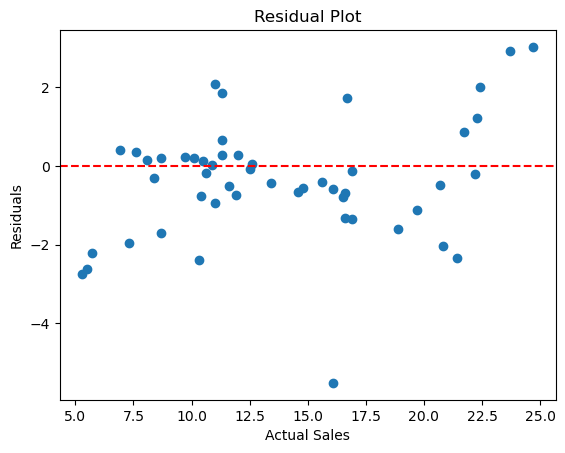

In [97]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.show()

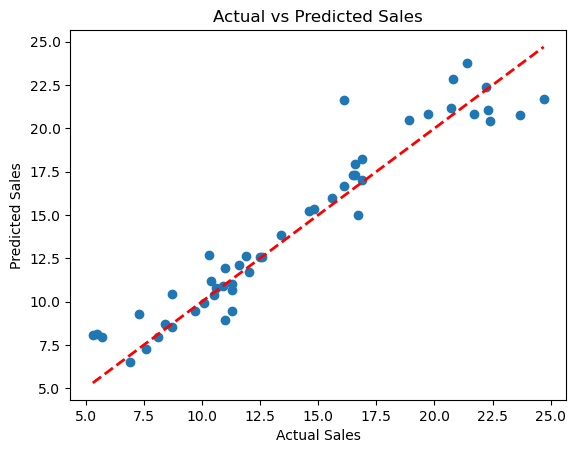

In [98]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

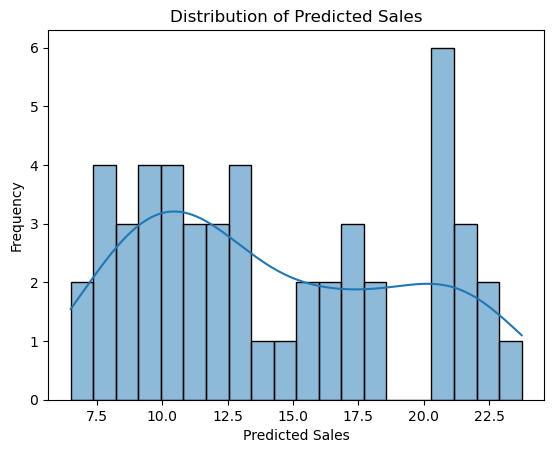

In [99]:
sns.histplot(y_pred, bins=20, kde=True)
plt.title('Distribution of Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Frequency')
plt.show()

#THANK YOU